In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
!pip install pydot graphviz

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import plot_model
!pip install visualkeras
import visualkeras
!pip uninstall scipy
!pip install scipy
import scipy.io



Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.14.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libscipy_openblas-c128ec02.so
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!sudo apt-get install unzip
!unzip -o /content/drive/MyDrive/f.zip
!unzip -o /content/drive/MyDrive/z.zip
!unzip -o /content/drive/MyDrive/n.zip
!unzip -o /content/drive/MyDrive/s.zip
!unzip -o /content/drive/MyDrive/o.zip
!unzip -o /content/drive/MyDrive/EEGmat.zip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Archive:  /content/drive/MyDrive/f.zip
   creating: F/
  inflating: __MACOSX/._F            
  inflating: F/F049.txt              
  inflating: __MACOSX/F/._F049.txt   
  inflating: F/F075.txt              
  inflating: __MACOSX/F/._F075.txt   
  inflating: F/F061.txt              
  inflating: __MACOSX/F/._F061.txt   
  inflating: F/F100.txt              
  inflating: __MACOSX/F/._F100.txt   
  inflating: F/F060.txt              
  inflating: __MACOSX/F/._F060.txt   
  inflating: F/F074.txt              
  inflating: __MACOSX/F/._F074.txt   
  inflating: F/F048.txt              
  inflating: __MACOSX/F/._F048.txt   
  inflating: F/F062.txt              
  inflating: __MACOSX/F/._F062.txt   
  inflating: F/F076.txt              
  inflating: __MACOSX/F/._F076.txt   
  infla

In [ ]:
!kaggle datasets download -d inancigdem/eeg-data-for-mental-attention-state-detection
!unzip eeg-data-for-mental-attention-state-detection.zip

Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection
License(s): copyright-authors
100% 557M/557M [00:26<00:00, 22.9MB/s]
100% 557M/557M [00:26<00:00, 22.3MB/s]
Archive:  eeg-data-for-mental-attention-state-detection.zip
replace EEG Data/eeg_record1.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace EEG Data/eeg_record1.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: EEG Data/eeg_record1.mat  
  inflating: EEG Data/eeg_record10.mat  
  inflating: EEG Data/eeg_record11.mat  
  inflating: EEG Data/eeg_record12.mat  
  inflating: EEG Data/eeg_record13.mat  
  inflating: EEG Data/eeg_record14.mat  
  inflating: EEG Data/eeg_record15.mat  
  inflating: EEG Data/eeg_record16.mat  
  inflating: EEG Data/eeg_record17.mat  
  inflating: EEG Data/eeg_record18.mat  
  inflating: EEG Data/eeg_record19.mat  
  inflating: EEG Data/eeg_record2.mat  
  inflating: EEG Data/eeg_record20.mat  
  inflating: EEG Data/

In [ ]:
file_names=[]
for dirname, _, filenames in os.walk('./eeg data/EEG Data/'):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))


In [ ]:
from scipy.signal import butter, lfilter, freqz

def butter_highpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order=order)
    x = signal.filtfilt(b, a, data)
    y = signal.filtfilt(b, a, x)
    return y
mat = scipy.io.loadmat(file_names[0])
data = mat['o']['data'][0,0]
FS = mat['o']['sampFreq'][0][0][0][0]
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
useful_channels=[3,16]
useful_channels_names=['AF3','AF4']

marker=128*60*10
#delete file #28 because it doesnot have enough data
useful_file_index = [3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,31,32,33,34]
#useful_file_index = np.arange(1,35)
chan_num=7
trail_names=[]
data_focus={}
data_unfocus={}
data_drowsy={}
focus={}
unfocus={}
drowsy={}
#for i in useful_file_index:
i=1
for index,filename in enumerate(filenames):
    if int(filename.split('d')[1].split('.')[0]) in useful_file_index:
        mat = scipy.io.loadmat(file_names[index])
        trail_names.append(filename.split('.')[0])
        data_focus[trail_names[-1]]=mat['o']['data'][0,0][0:marker,useful_channels].copy()
        data_unfocus[trail_names[-1]]=mat['o']['data'][0,0][marker:2*marker,useful_channels].copy()
        data_drowsy[trail_names[-1]]=mat['o']['data'][0,0][2*marker:3*marker,useful_channels].copy()
        focus[trail_names[-1]]=mat['o']['data'][0,0][0:marker,useful_channels].copy()
        unfocus[trail_names[-1]]=mat['o']['data'][0,0][marker:2*marker,useful_channels].copy()
        drowsy[trail_names[-1]]=mat['o']['data'][0,0][2*marker:3*marker,useful_channels].copy()
data_focus.keys()

row, col = data_focus['eeg_record3'].shape
for name in trail_names:
    for i in range(col):
        data_focus[name][:,i]=butter_highpass_filter(data_focus[name][:,i], 0.16, 128, 4)
        data_unfocus[name][:,i]=butter_highpass_filter(data_unfocus[name][:,i], 0.16, 128, 4)
        data_drowsy[name][:,i]=butter_highpass_filter(data_drowsy[name][:,i], 0.16, 128, 4)

feature_names = []
freq_range=np.arange(0.5,18.5,0.5)
symb='_'
#useful_channels_names=['AF3','AF4']
for index,channel in enumerate(useful_channels_names):
    for freq in freq_range:
        feature_names.append(channel+symb+str(freq))

from scipy.signal import blackman
# Number of sample points
N = 256
# sample spacing
T = 1.0 / 128.0

w = blackman(N)

#col is 2
power_focus = {}
for name in trail_names:
    power_focus[name]=np.zeros([col,36,300])

power_unfocus = {}
for name in trail_names:
    power_unfocus[name]=np.zeros([col,36,300])


power_drowsy = {}
for name in trail_names:
    power_drowsy[name]=np.zeros([col,36,300])

#the output of the stft is 513*601,1 second data will produce 1 column of data,there are 601
for name in trail_names:
    for i in range(col):
        for j in range(300):
            y1=fft(data_focus[name][:,i][j*256:(j+1)*256]*w)
            y2=fft(data_unfocus[name][:,i][j*256:(j+1)*256]*w)
            y3=fft(data_drowsy[name][:,i][j*256:(j+1)*256]*w)
            power_focus[name][i,:,j]=2.0/N * np.abs(y1[0:36])
            power_unfocus[name][i,:,j]=2.0/N * np.abs(y2[0:36])
            power_drowsy[name][i,:,j]=2.0/N * np.abs(y3[0:36])



ImportError: cannot import name 'blackman' from 'scipy.signal' (/usr/local/lib/python3.10/dist-packages/scipy/signal/__init__.py)

In [ ]:
label_focus = [0]*300
#--------1
label_unfocus = [1]*300
#--------2
label_drowsy = [2]*300

#subject is the variable for all participants

subj1_files={'eeg_record3','eeg_record4','eeg_record5','eeg_record6','eeg_record7'}
subj2_files={'eeg_record10','eeg_record11','eeg_record12','eeg_record13','eeg_record14'}
subj3_files={'eeg_record17','eeg_record18','eeg_record19','eeg_record20','eeg_record21'}
subj4_files={'eeg_record24','eeg_record25','eeg_record26','eeg_record27'}
subj5_files={'eeg_record31','eeg_record32','eeg_record33','eeg_record34'}

target=[]
subj=np.array([]).reshape(72,0).copy()
for name in trail_names:
    subj=np.concatenate((subj,svm_focus[name]), axis=1)
    subj=np.concatenate((subj,svm_unfocus[name]), axis=1)
    subj=np.concatenate((subj,svm_drowsy[name]), axis=1)
    target = target+label_focus+label_unfocus+label_drowsy
subj=subj.T
target = np.array(target)


NameError: name 'svm_focus' is not defined

In [ ]:
from statistics import mean

data_root = './eeg data/EEG Data/'

files = os.listdir(data_root)

#channel_indices = np.array(range(3, 17))
#channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
channel_indices=[3,16]
channel_names=['AF3','AF4']
channel_map = dict(zip(channel_names, channel_indices))
subjects = [3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,31,32,33,34]


bands = {'alpha': (8, 13), 'delta': (0.5, 4), 'beta': (13, 30), 'gamma': (30, np.inf)}
states_val = {'focused':0,'unfocused':1,'drowsy':2}

def get_data(filename):
    mat = scipy.io.loadmat(os.path.join(data_root, filename))
    data = mat['o']['data'][0, 0]
    FS = mat['o']['sampFreq'][0][0][0][0]

    states = {
     'focused': data[:FS * 10 * 60, :],
      'unfocused': data[FS * 10 * 60:FS * 20 * 60, :],
      'drowsy': data[FS * 30 * 60:, :],
    }
    return states

def get_powers(channel, FS=128):
    channel = channel - channel.mean()
    freq, psd = signal.periodogram(channel, fs=FS, nfft=256)

    powers = {}
    for band_name, band_limits in bands.items():
        low, high = band_limits
        powers[band_name] = psd[(freq >= low) & (freq < high)].mean()
    return powers


rows_list = []
for subject_idx in subjects:
    states = get_data(f"eeg_record{subject_idx}.mat")
    for ch_name, ch_idx in channel_map.items():
        for state, eeg in states.items():
            powers = get_powers(eeg[:, ch_idx])
            powers['state'] = state
            powers['channel'] = ch_name
            powers['subject'] = f"subject_{subject_idx}"
            rows_list.append(powers)


df = pd.DataFrame.from_dict(rows_list)
# df = df.drop(columns=['channel'])


# agg_functions = {'alpha': 'mean','delta':'mean','beta':'mean','gamma':'mean' }

# #create new DataFrame by combining rows with same id values
# df=df.groupby(['subject', 'state']).median().reset_index()


# # df['res'] = df.apply(lambda row: row.state + row.b, axis=1)

# df["res"]=df.apply(lambda row:states_val[row.state],axis=1)
df


,alpha,delta,beta,gamma,state,channel,subject
0,0.228355,0.643568,0.384242,0.049516,focused,AF3,subject_3
1,0.096152,0.105728,0.060660,0.012460,unfocused,AF3,subject_3
2,0.026436,0.058373,0.081694,0.014792,drowsy,AF3,subject_3
3,7.403233,1066.500969,3.061691,0.734220,focused,AF4,subject_3
4,1.616172,571.410240,0.599811,0.106072,unfocused,AF4,subject_3
...,...,...,...,...,...,...,...
133,0.039259,0.361327,0.032952,0.015801,unfocused,AF3,subject_34
134,0.074724,0.066867,0.051686,0.034759,drowsy,AF3,subject_34
135,2.321054,453.761802,0.612238,0.164705,focused,AF4,subject_34
136,4.457651,12.294688,0.538172,0.062791,unfocused,AF4,subject_34


In [ ]:
x=np.array(df[['alpha','delta','beta','gamma']])
y=np.array(df['res'])
#y= to_categorical(y, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

# Define the linear SVM model
svm_model = SVC(kernel='poly')

# Train the model
svm_model.fit(x_train, y_train)


# Standardize the test features
x_test = scaler.transform(X_test)

# Predict the labels
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")

# Print predictions
print(f"Predictions: {y_pred}")
print(f"True Labels: {y_test}")

Test accuracy: 0.6428571428571429
Predictions: [1 1 1 1 1 1 1 1 1 1 1 2 1 1]
True Labels: [2 0 1 2 1 1 1 1 0 1 1 2 0 1]


In [ ]:

# Specify the directory you want to read
dictionaries = ['/content/EEG Data']

# Initialize an empty list to store the dataframes
lists = []
values=[]
# Iterate over all files in the directory

for ind,path in enumerate(dictionaries):
  for filename in os.listdir(path):
      if( filename.split('.')[-1]=='mat'):
        if True:
            # Construct the full file path
            print(filename)
            file_path = os.path.join(path, filename)
            data = loadmat(file_path)

            lists.append(data)



# X=np.array(lists,int)

# Y=np.array(values,int)
# Y[Y>1] = 0
# Y=Y.reshape((-1,1))
# #Y = to_categorical(Y, num_classes=2)

# X.shape
# Y.shape

In [ ]:
mat=lists[8]
data = mat['o']['data'][0, 0]
FS = mat['o']['sampFreq'][0][0][0][0]

data
FS


128

In [ ]:

# Specify the directory you want to read
# dictionaries = ['/content/F','/content/Z','/content/N','/content/S','/content/O']
dictionaries = ['/content/Z','/content/S']
HealthyEEG=['Z']
# HealthyEEG=['Z','O']
# EphlipticNonEphlipsyEEG=['N','F']
EphlipticWhileEphlipsyEEG=['S']

# Initialize an empty list to store the dataframes
lists = []
values=[]
# Iterate over all files in the directory

for ind,path in enumerate(dictionaries):
  for filename in os.listdir(path):
      # Check if the current file is a JSON file
      if True:
          # Construct the full file path
          file_path = os.path.join(path, filename)
          with open(file_path) as file:
             lines = [int(line.rstrip()) for line in file]
             if(path.split('/')[2] in (HealthyEEG)):#+EphlipticNonEphlipsyEEG)):
                values.append(0)
             elif (path.split('/')[2] in EphlipticWhileEphlipsyEEG):
                values.append(1)


          lists.append(np.array(lines))



X=np.array(lists,int)

Y=np.array(values,int)
#Y[Y>1] = 0
Y=Y.reshape((-1,1))
#Y = to_categorical(Y, num_classes=2)

X.shape
Y.shape

(200, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((150, 4097), (50, 4097), (150, 1), (50, 1))

In [ ]:
def denseBlock(dims,inp) :
    x = tf.keras.layers.BatchNormalization() (inp)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(4097,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    return x

In [ ]:
inp = tf.keras.layers.Input(shape=(4097,),name='input')
x1 = denseBlock(256,inp)
x2 = denseBlock(512,inp)
x3 = denseBlock(1024,inp)
x4 = denseBlock(2048,inp)
x5 = denseBlock(4096,inp)
x = tf.keras.layers.Concatenate()([x1,x2,x3,x4,x5])
x = tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output') (x)

model = tf.keras.models.Model(inp,out)
visualkeras.layered_view(model)



/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


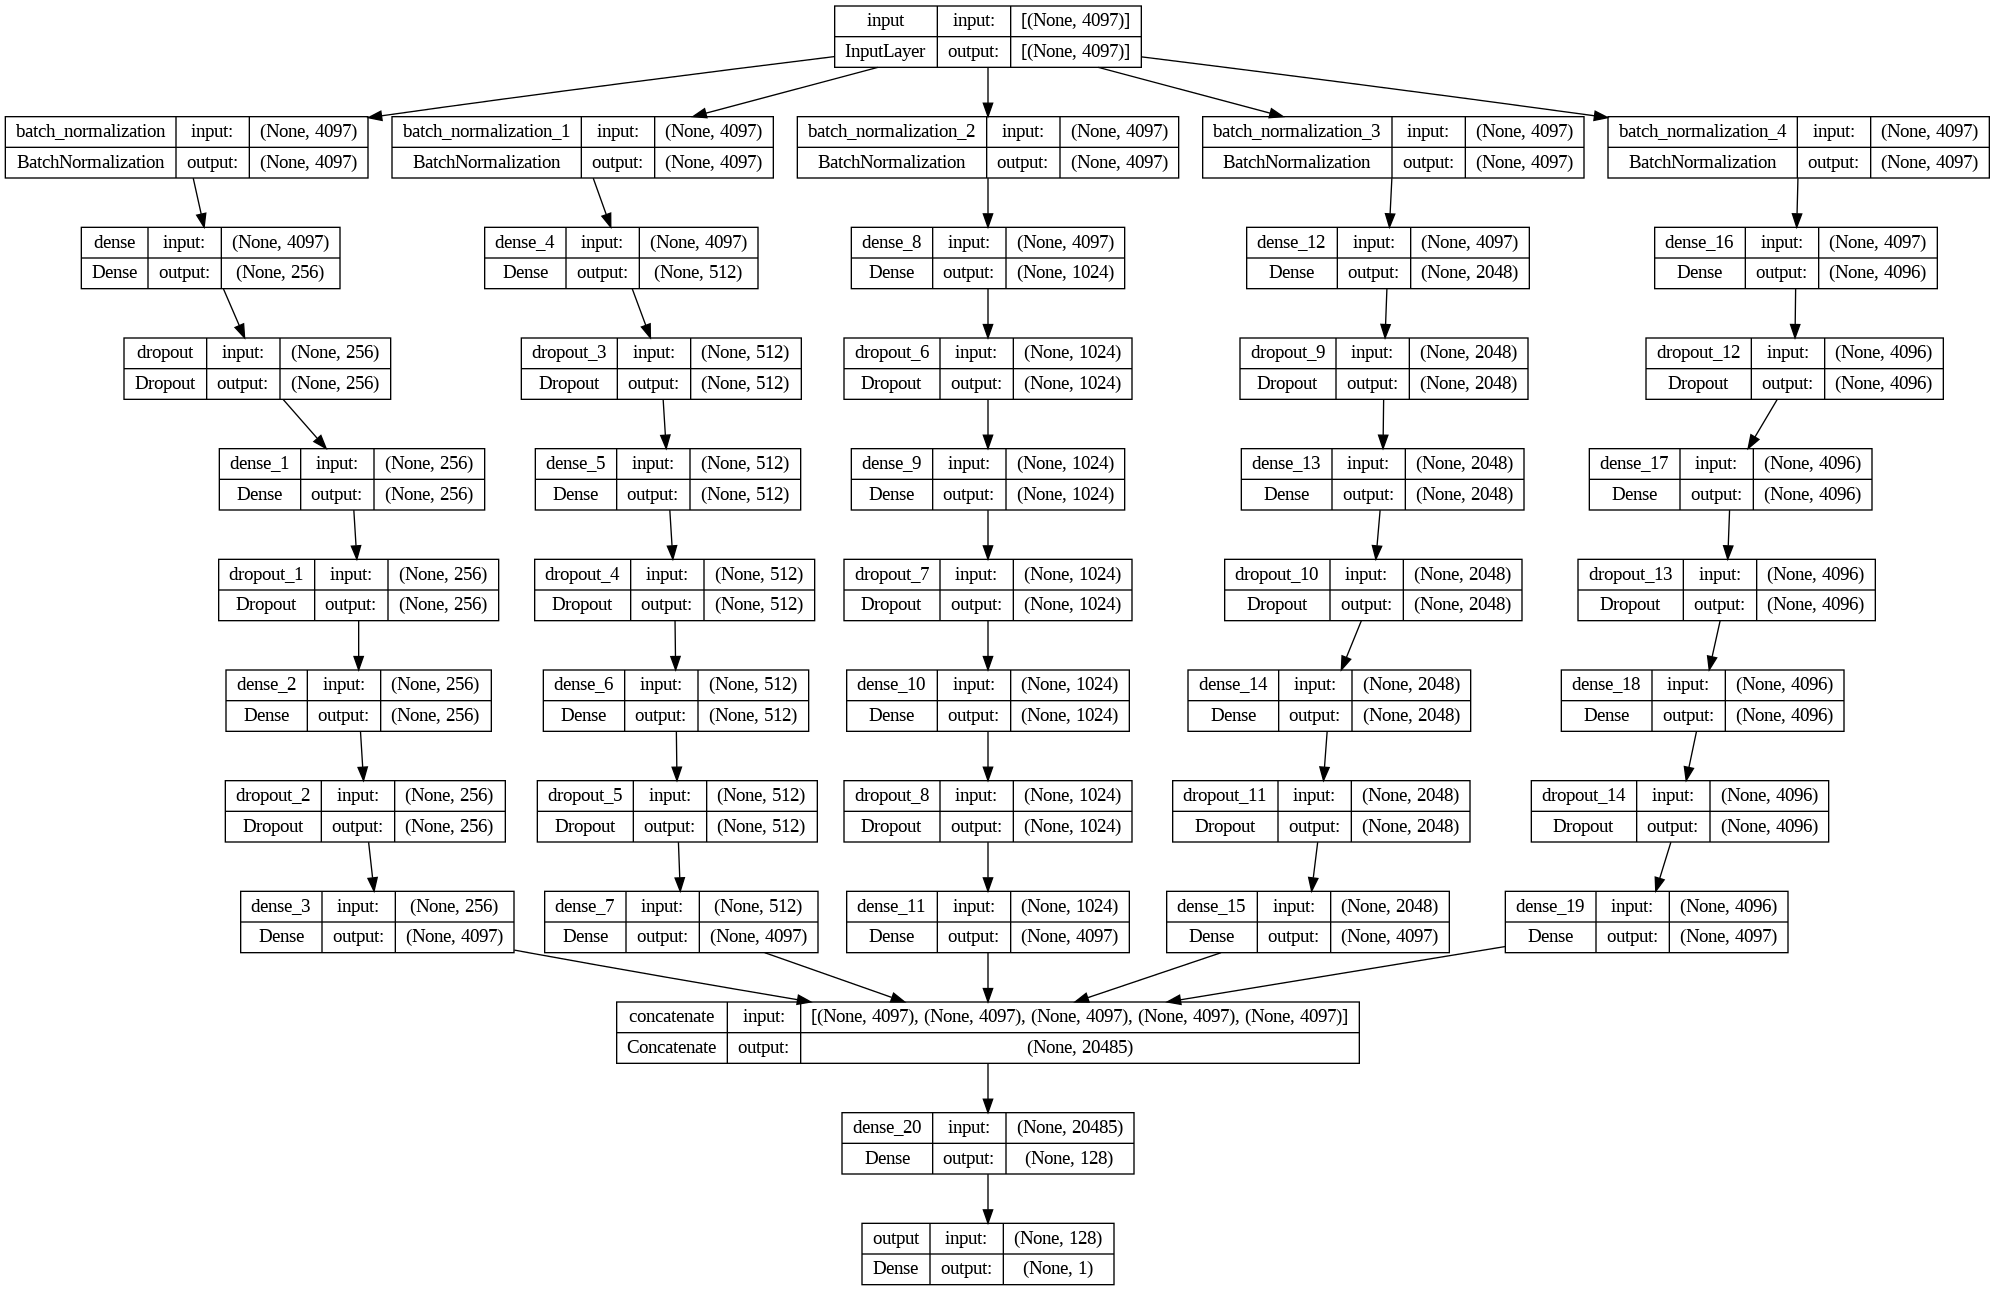

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=128,validation_split=0.2)


Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.6458 - accuracy: 0.5000 - val_loss: 5.5626 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 104ms/step - loss: 0.9613 - accuracy: 0.5000 - val_loss: 3.6999 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 126ms/step - loss: 0.7947 - accuracy: 0.5000 - val_loss: 2.1242 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 95ms/step - loss: 0.5555 - accuracy: 0.5000 - val_loss: 1.0886 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 106ms/step - loss: 0.4140 - accuracy: 0.5333 - val_loss: 0.6302 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 88ms/step - loss: 0.3728 - accuracy: 0.9750 - val_loss: 0.4896 - val_accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 85ms/step - loss: 0.3489 - accuracy: 0.9750 - val_loss: 0.4960 - val_accuracy: 0.6667
Epoch 8/100
1/1 [

In [ ]:
model.evaluate(X_test,y_test)


2/2 [==============================] - 0s 12ms/step - loss: 2.8107 - accuracy: 0.8400


[2.8106658458709717, 0.8399999737739563]